Dataset shape: (569, 30)
Class distribution:
1    357
0    212
Name: count, dtype: int64
Train shape: (455, 30)
Test shape: (114, 30)
Model trained successfully.


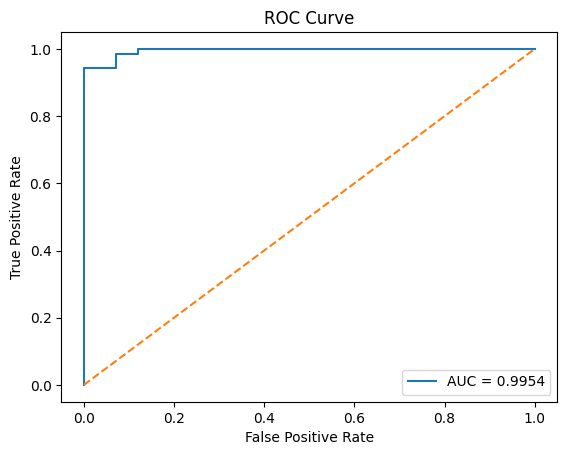

AUC: 0.9953703703703703


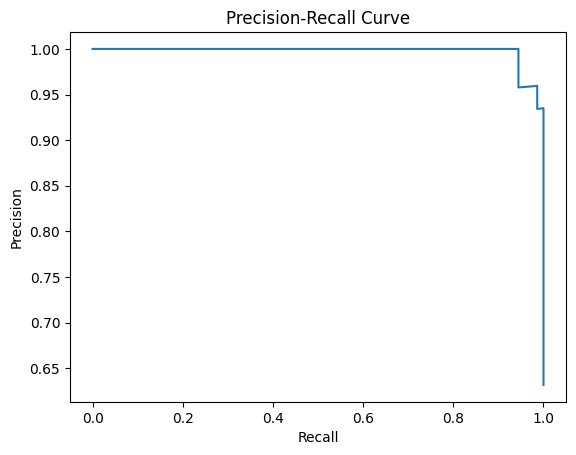

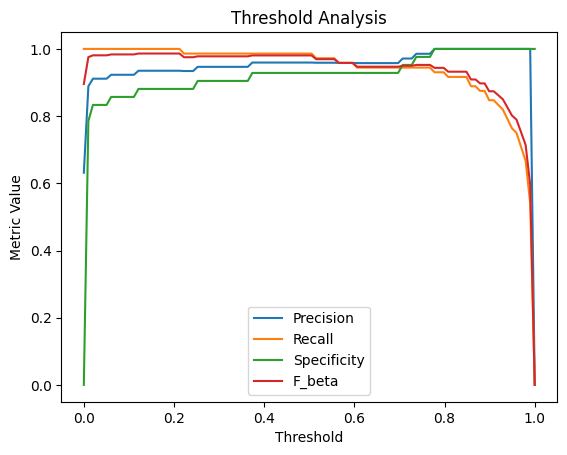

Best threshold:
threshold      0.121212
precision      0.935065
recall         1.000000
specificity    0.880952
f_beta         0.986301
Name: 12, dtype: float64


In [5]:
import evaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

X = data.data
y = data.target

print("Dataset shape:", X.shape)
print("Class distribution:")
print(pd.Series(y).value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

print("Model trained successfully.")

fpr, tpr, thresholds, roc_auc = evaluation.compute_roc_auc(y_test, y_proba)
evaluation.plot_roc_curve(fpr, tpr, roc_auc)

print("AUC:", roc_auc)

precision_vals, recall_vals, pr_thresholds = evaluation.compute_pr_curve(y_test, y_proba)
evaluation.plot_pr_curve(precision_vals, recall_vals)

df_metrics = evaluation.threshold_sweep(y_test, y_proba, beta=2)
evaluation.plot_threshold_curves(df_metrics)

best = evaluation.find_best_threshold(df_metrics)

print("Best threshold:")
print(best)


